# **Libraries**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# **Data Extraction and Analysis**

In [47]:
df = pd.read_csv('car_data.csv')

In [48]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
df.shape

(301, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [51]:
df.describe().style.format(precision=2)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [53]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [54]:
df.duplicated().sum()

2

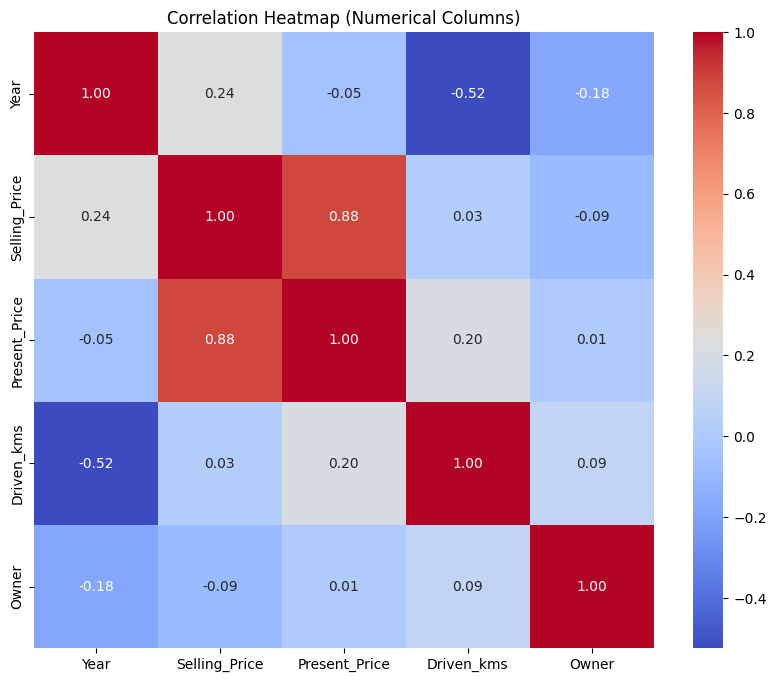

In [55]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [57]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [58]:
print(df['Selling_type'].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64


In [59]:
print(df['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


# **Data Cleaning**

In [56]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [60]:
# Encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# Encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# Encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

# **Model**

In [61]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493416
R-squared: 0.7409934356413092


In [65]:
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8829.49338250246
